<a href="https://colab.research.google.com/github/riks01/converse_shoes_detector/blob/main/yolov4/yolov4_ConverseLogo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
%cd drive/MyDrive/yolov4/

/content/drive/MyDrive/yolov4


In [ ]:
# downloading the darknet framework
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15494, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 15494 (delta 0), reused 2 (delta 0), pack-reused 15490
Receiving objects: 100% (15494/15494), 14.11 MiB | 6.52 MiB/s, done.
Resolving deltas: 100% (10409/10409), done.
Checking out files: 100% (2057/2057), done.


In [ ]:
# moving into darknet folder
%cd darknet/

/content/drive/MyDrive/yolov4/darknet


In [ ]:
# making changes in the makefile
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

In [ ]:
# updating changes
!make

In [ ]:
# checking current working directory
!pwd

/content/drive/MyDrive/yolov4/darknet


In [ ]:
# Here we use transfer learning. Instead of training a model from scratch, we use pre-trained YOLOv4 weights which have been trained up to 137 convolutional layers. 
# Run the following command to download the YOLOv4 pre-trained weights file.
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
%cd data/

/content/drive/MyDrive/yolov4/darknet/data


In [ ]:
!ls

12.jpg		       labels		piford.data   process.py
converse-run-star.jpg  multiple_images	piford.names


In [ ]:
# running this .py file to generate training and testing images path by creating train.txt and test.txt file
!python process.py

In [ ]:
%cd ..

/content/drive/MyDrive/yolov4/darknet


In [ ]:
# allowing permission for darknet folder
!chmod +x ./darknet

In [ ]:
# training our yolov4 model 
!./darknet detector train data/piford.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map

In [ ]:
!pwd

/content/drive/MyDrive/yolov4


In [ ]:
%cd darknet

/content/drive/MyDrive/yolov4/darknet


In [ ]:
# allowing permission to access darknet folder
!chmod +x ./darknet

In [ ]:
# making changes in  yolov4-custom.cfg file to support testing
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom.cfg
%cd ..

/content/drive/MyDrive/yolov4/darknet/cfg
/content/drive/MyDrive/yolov4/darknet


In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

In [ ]:
# checking current working directory
!pwd

/content/drive/MyDrive/yolov4/darknet


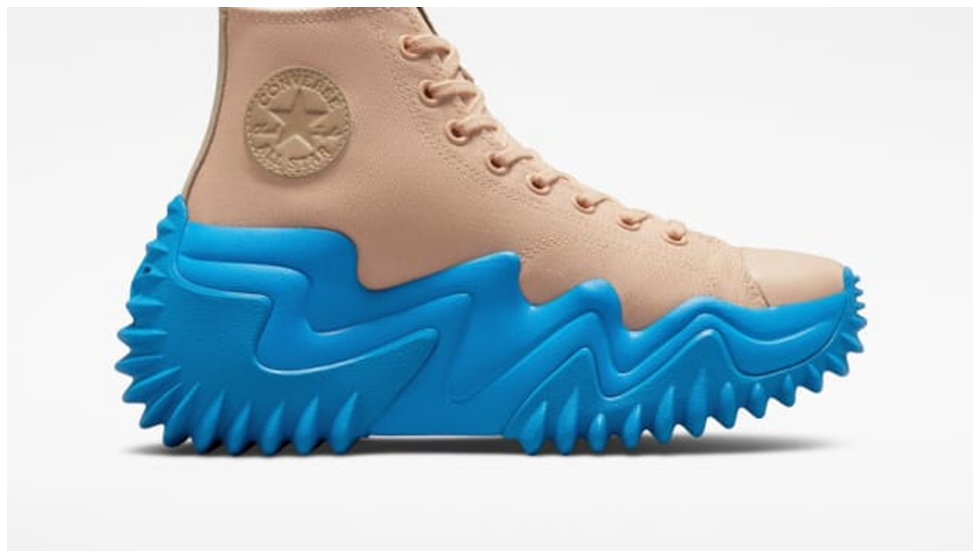

In [ ]:
# image to be tested
imShow("data/converse-run-star.jpg")

In [ ]:
# detecting converse logo in above image by keeping threshold value to 0.3
!./darknet detector test data/piford.data cfg/yolov4-custom.cfg backup/yolov4-custom_best.weights data/converse-run-star.jpg -thresh 0.3

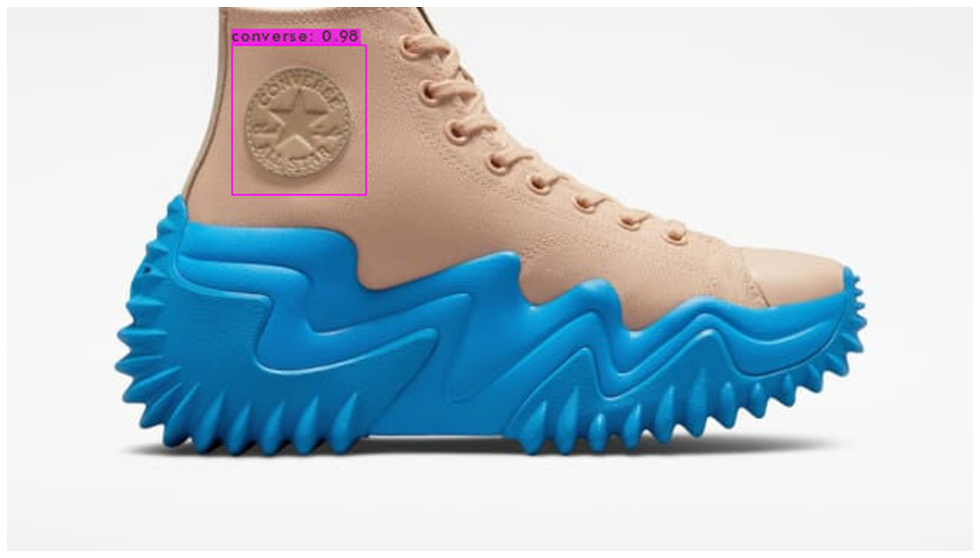

In [ ]:
imShow('predictions.jpg')

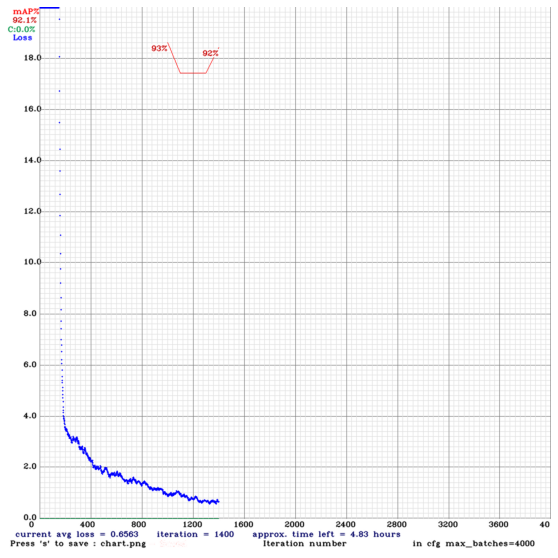

In [ ]:
# can check the performance of all the trained weights by looking at the chart.png file. 
imShow('chart.png')